# Contrast  Enhancement

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure

In [2]:
#im_file = '../images/window.JPG'
#im_BGR = cv2.imread(im_file)
#cv2.imwrite('../images/window.jpg',im_BGR[::2,::2,:])

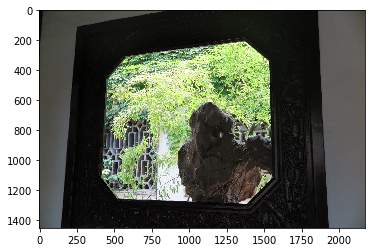

In [3]:
im_file = '../images/window.JPG'

im_BGR = cv2.imread(im_file)
im_RGB = cv2.cvtColor(im_BGR,cv2.COLOR_BGR2RGB)
plt.imshow(im_RGB)

## Gamma Correction

In [4]:
def apply_gamma_channel(img, dim, gamma=1, gain=1):
    channel = np.zeros(shape=img.shape, dtype=np.uint8)
    channel[:,:,dim] = exposure.adjust_gamma(img[:,:,dim], gamma, gain)
    img[:,:,dim] = channel[:,:,dim]

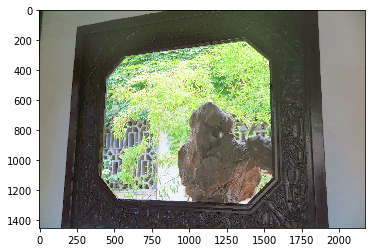

In [5]:
im_HSV = cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HSV)
apply_gamma_channel(im_HSV, 2, 0.5)
plt.imshow(cv2.cvtColor(im_HSV, cv2.COLOR_HSV2RGB))

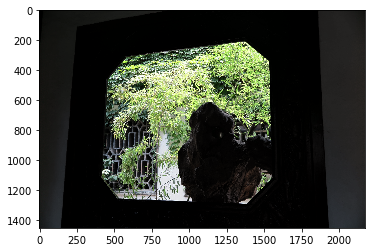

In [6]:
im_HSV = cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HSV)
apply_gamma_channel(im_HSV, 2, 2)
plt.imshow(cv2.cvtColor(im_HSV, cv2.COLOR_HSV2RGB))

## Histogram Equalization

In [7]:
def apply_eqhist_channel(img, dim):
    channel = np.zeros(shape=img.shape, dtype=np.uint8)
    channel[:,:,dim] = cv2.equalizeHist(img[:,:,dim])
    img[:,:,dim] = channel[:,:,dim]

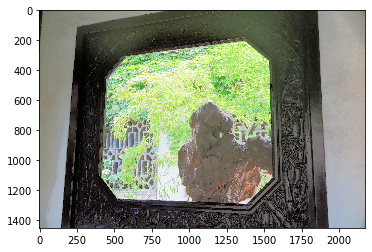

In [8]:
im_HSV = cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HSV)
apply_eqhist_channel(im_HSV, 2)
plt.imshow(cv2.cvtColor(im_HSV, cv2.COLOR_HSV2RGB))

## Adaptive Histogram Equalization

In [9]:
def apply_CLAHE_channel(img, dim):
    channel = np.zeros(shape=img.shape, dtype=np.uint8)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(12,12))
    channel[:,:,dim] = clahe.apply(img[:,:,dim])
    img[:,:,dim] = channel[:,:,dim]

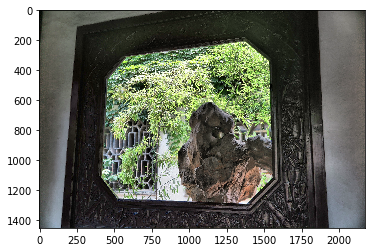

In [10]:
im_HSV = cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HSV)
apply_CLAHE_channel(im_HSV, 2)
plt.imshow(cv2.cvtColor(im_HSV, cv2.COLOR_HSV2RGB))